<a href="https://colab.research.google.com/github/vishnusankar2203/mini-project/blob/main/liver_cirrhosis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("/content/cirrhosis.csv")
data.head(17)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [ ]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
arr = data.select_dtypes(include = (['int64', 'float64'])).columns
for c in arr:
    data[c].fillna(data[c].median(), inplace=True)

arr.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
df_cat_col = data.select_dtypes(include=('object')).columns
for c in df_cat_col:
    data[c].fillna(data[c].mode().values[0], inplace=True)

data.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [ ]:
z = (data - data.mean())/data.std()
z2 = z[(z>5)|(z<-5)]
k = z[["Albumin",'Albumin',"Bilirubin","Cholesterol","Copper","Platelets",'Prothrombin',"Tryglicerides","SGOT"]]


for p in k:
    z3 = np.where((z[p]>6.5) | (z[p]<-6.5))
    print(z3)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([129, 246]),)
(array([17]),)
(array([], dtype=int64),)
(array([324]),)
(array([74]),)
(array([165]),)


<ipython-input-7-e6a00c0de960>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = (data - data.mean())/data.std()
<ipython-input-7-e6a00c0de960>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = (data - data.mean())/data.std()


In [ ]:
z = (data - data.mean())/data.std()
z2 = z[(z>5)|(z<-5)]
k = z[["Albumin",'Albumin',"Bilirubin","Cholesterol","Copper","Platelets",'Prothrombin',"Tryglicerides","SGOT"]]


for p in k:
    z3 = np.where((z[p]>6.5) | (z[p]<-6.5))
    print(z3)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([129, 246]),)
(array([17]),)
(array([], dtype=int64),)
(array([324]),)
(array([74]),)
(array([165]),)


<ipython-input-8-e6a00c0de960>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = (data - data.mean())/data.std()
<ipython-input-8-e6a00c0de960>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = (data - data.mean())/data.std()


In [ ]:
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,24472,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,416,1055,C,D-penicillamine,20819,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,417,691,C,D-penicillamine,21185,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


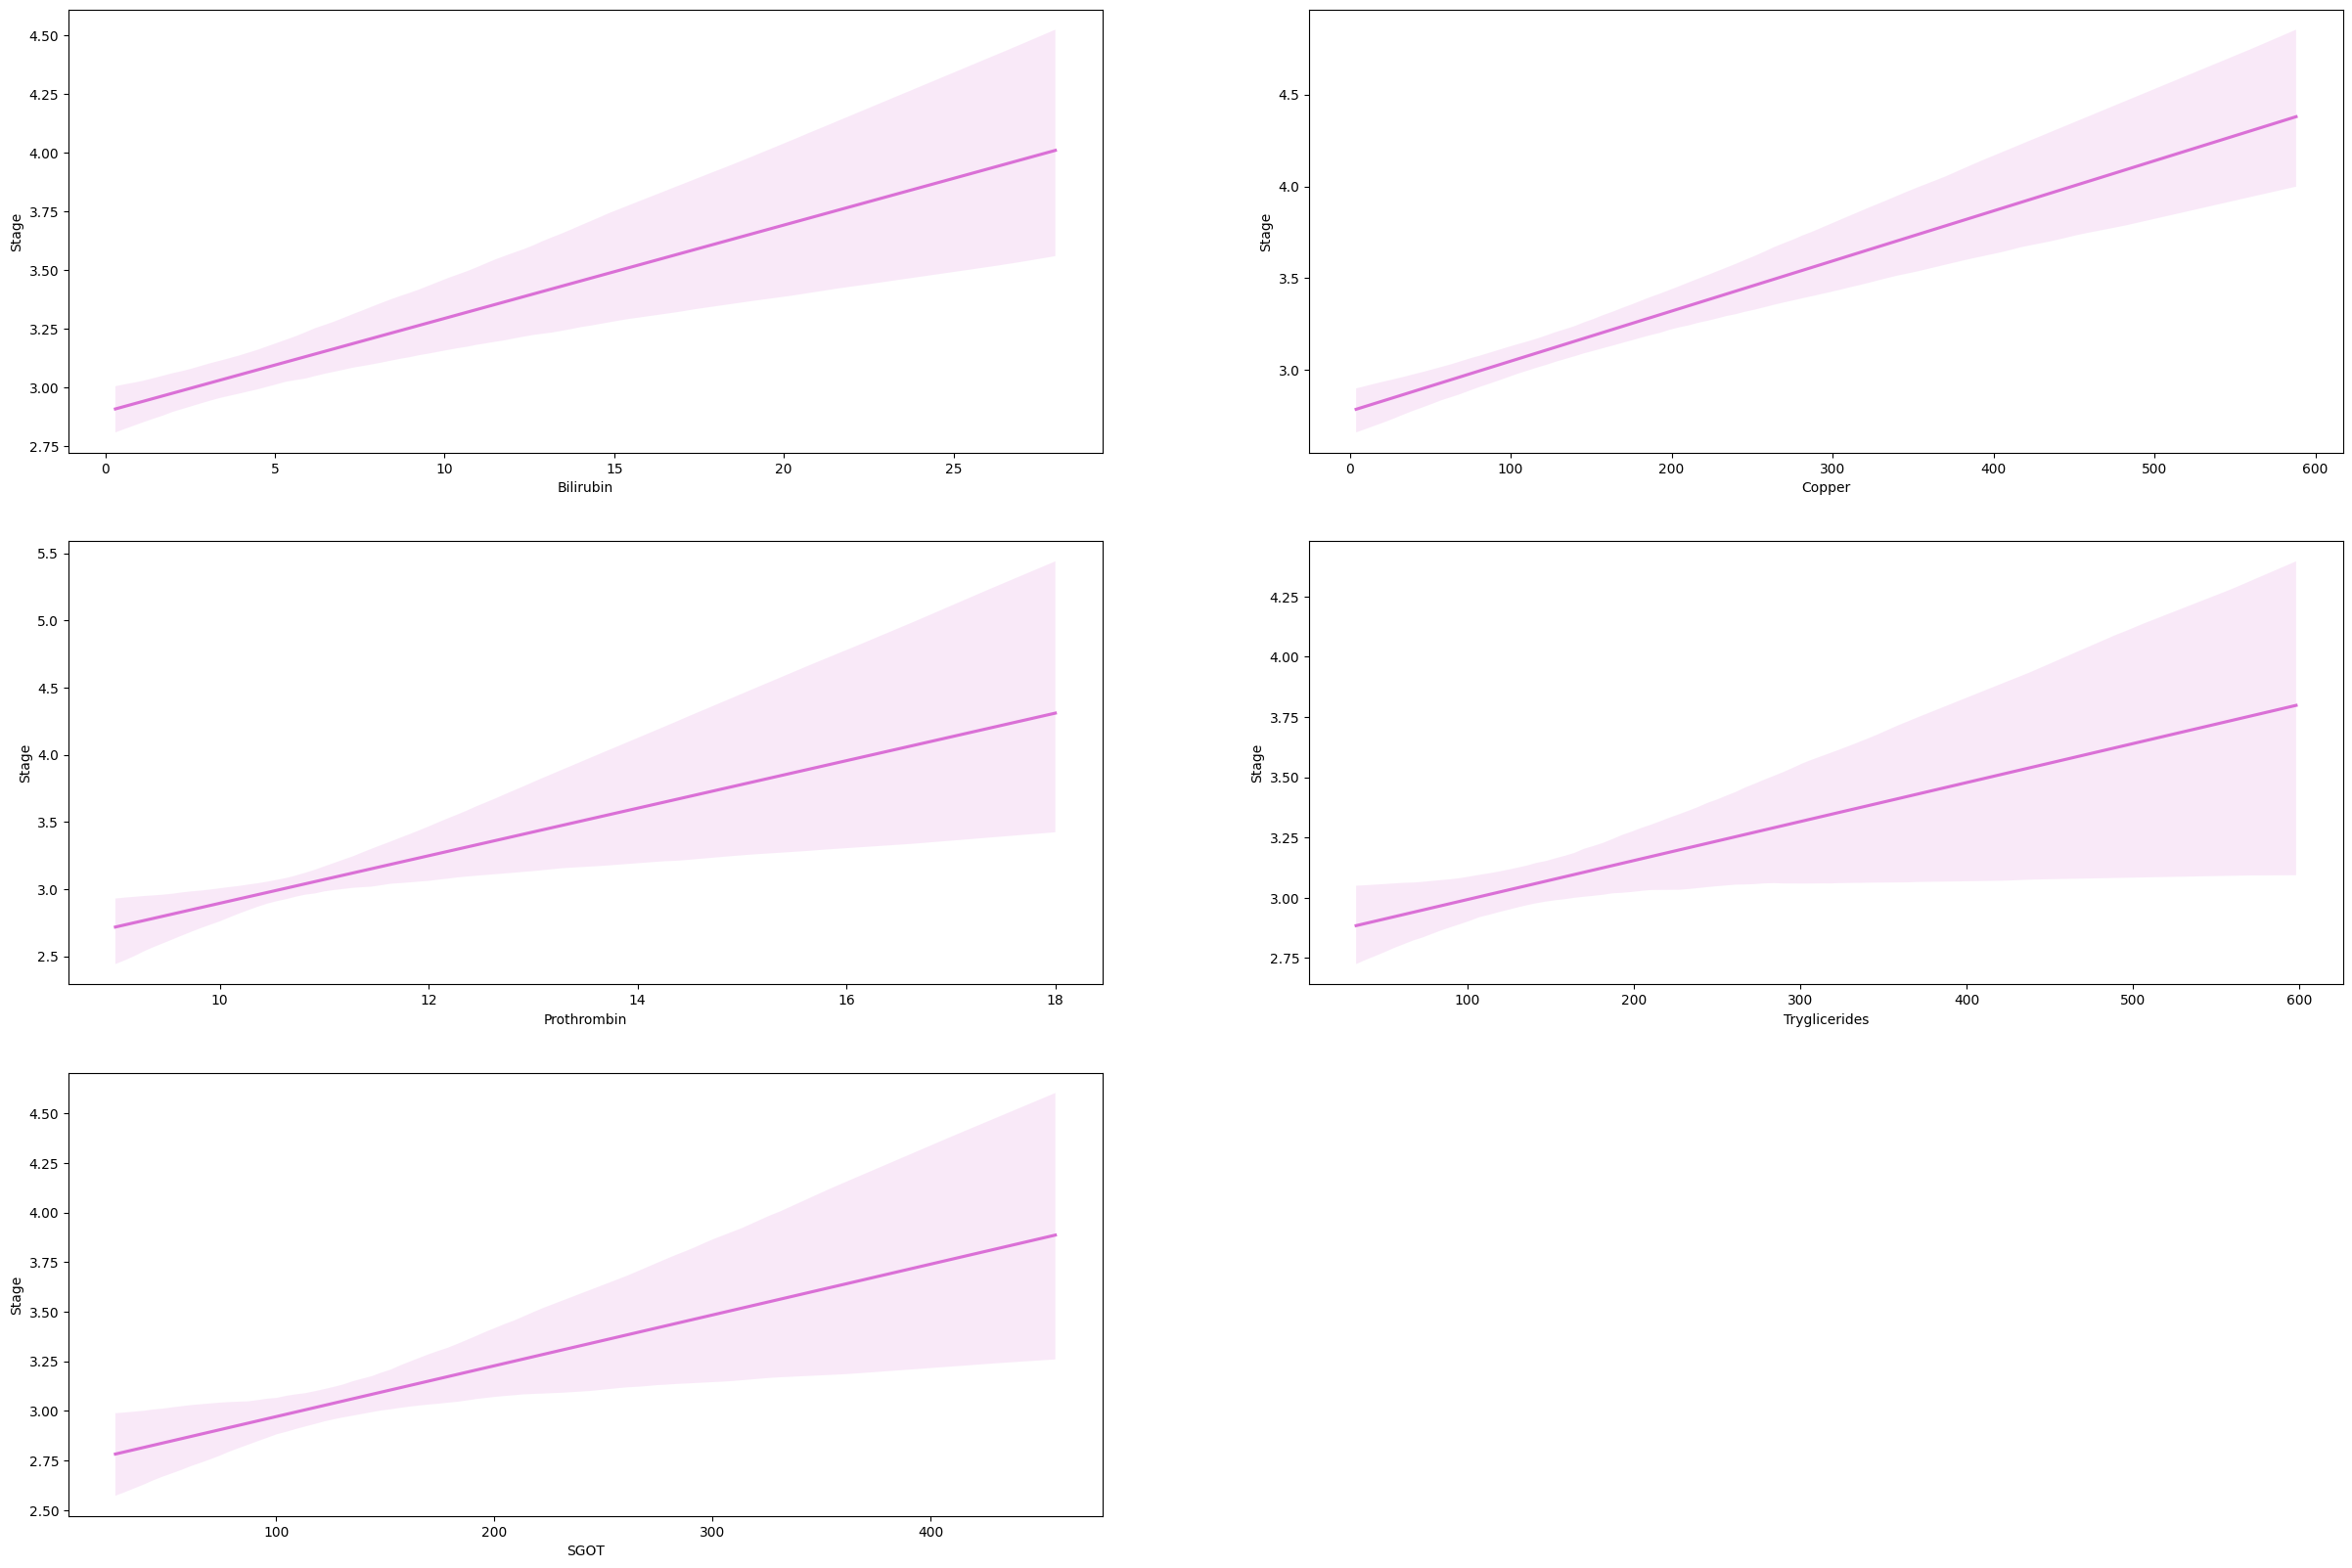

In [ ]:
plt.figure(figsize = (30,20))
loop = data[["Bilirubin","Copper",'Prothrombin',"Tryglicerides","SGOT"]]
i = 0
for c in loop:
    i +=1
    plt.subplot(3,2,i)
    sn.regplot(x = data[c],y = data["Stage"],scatter=False, color='orchid',)




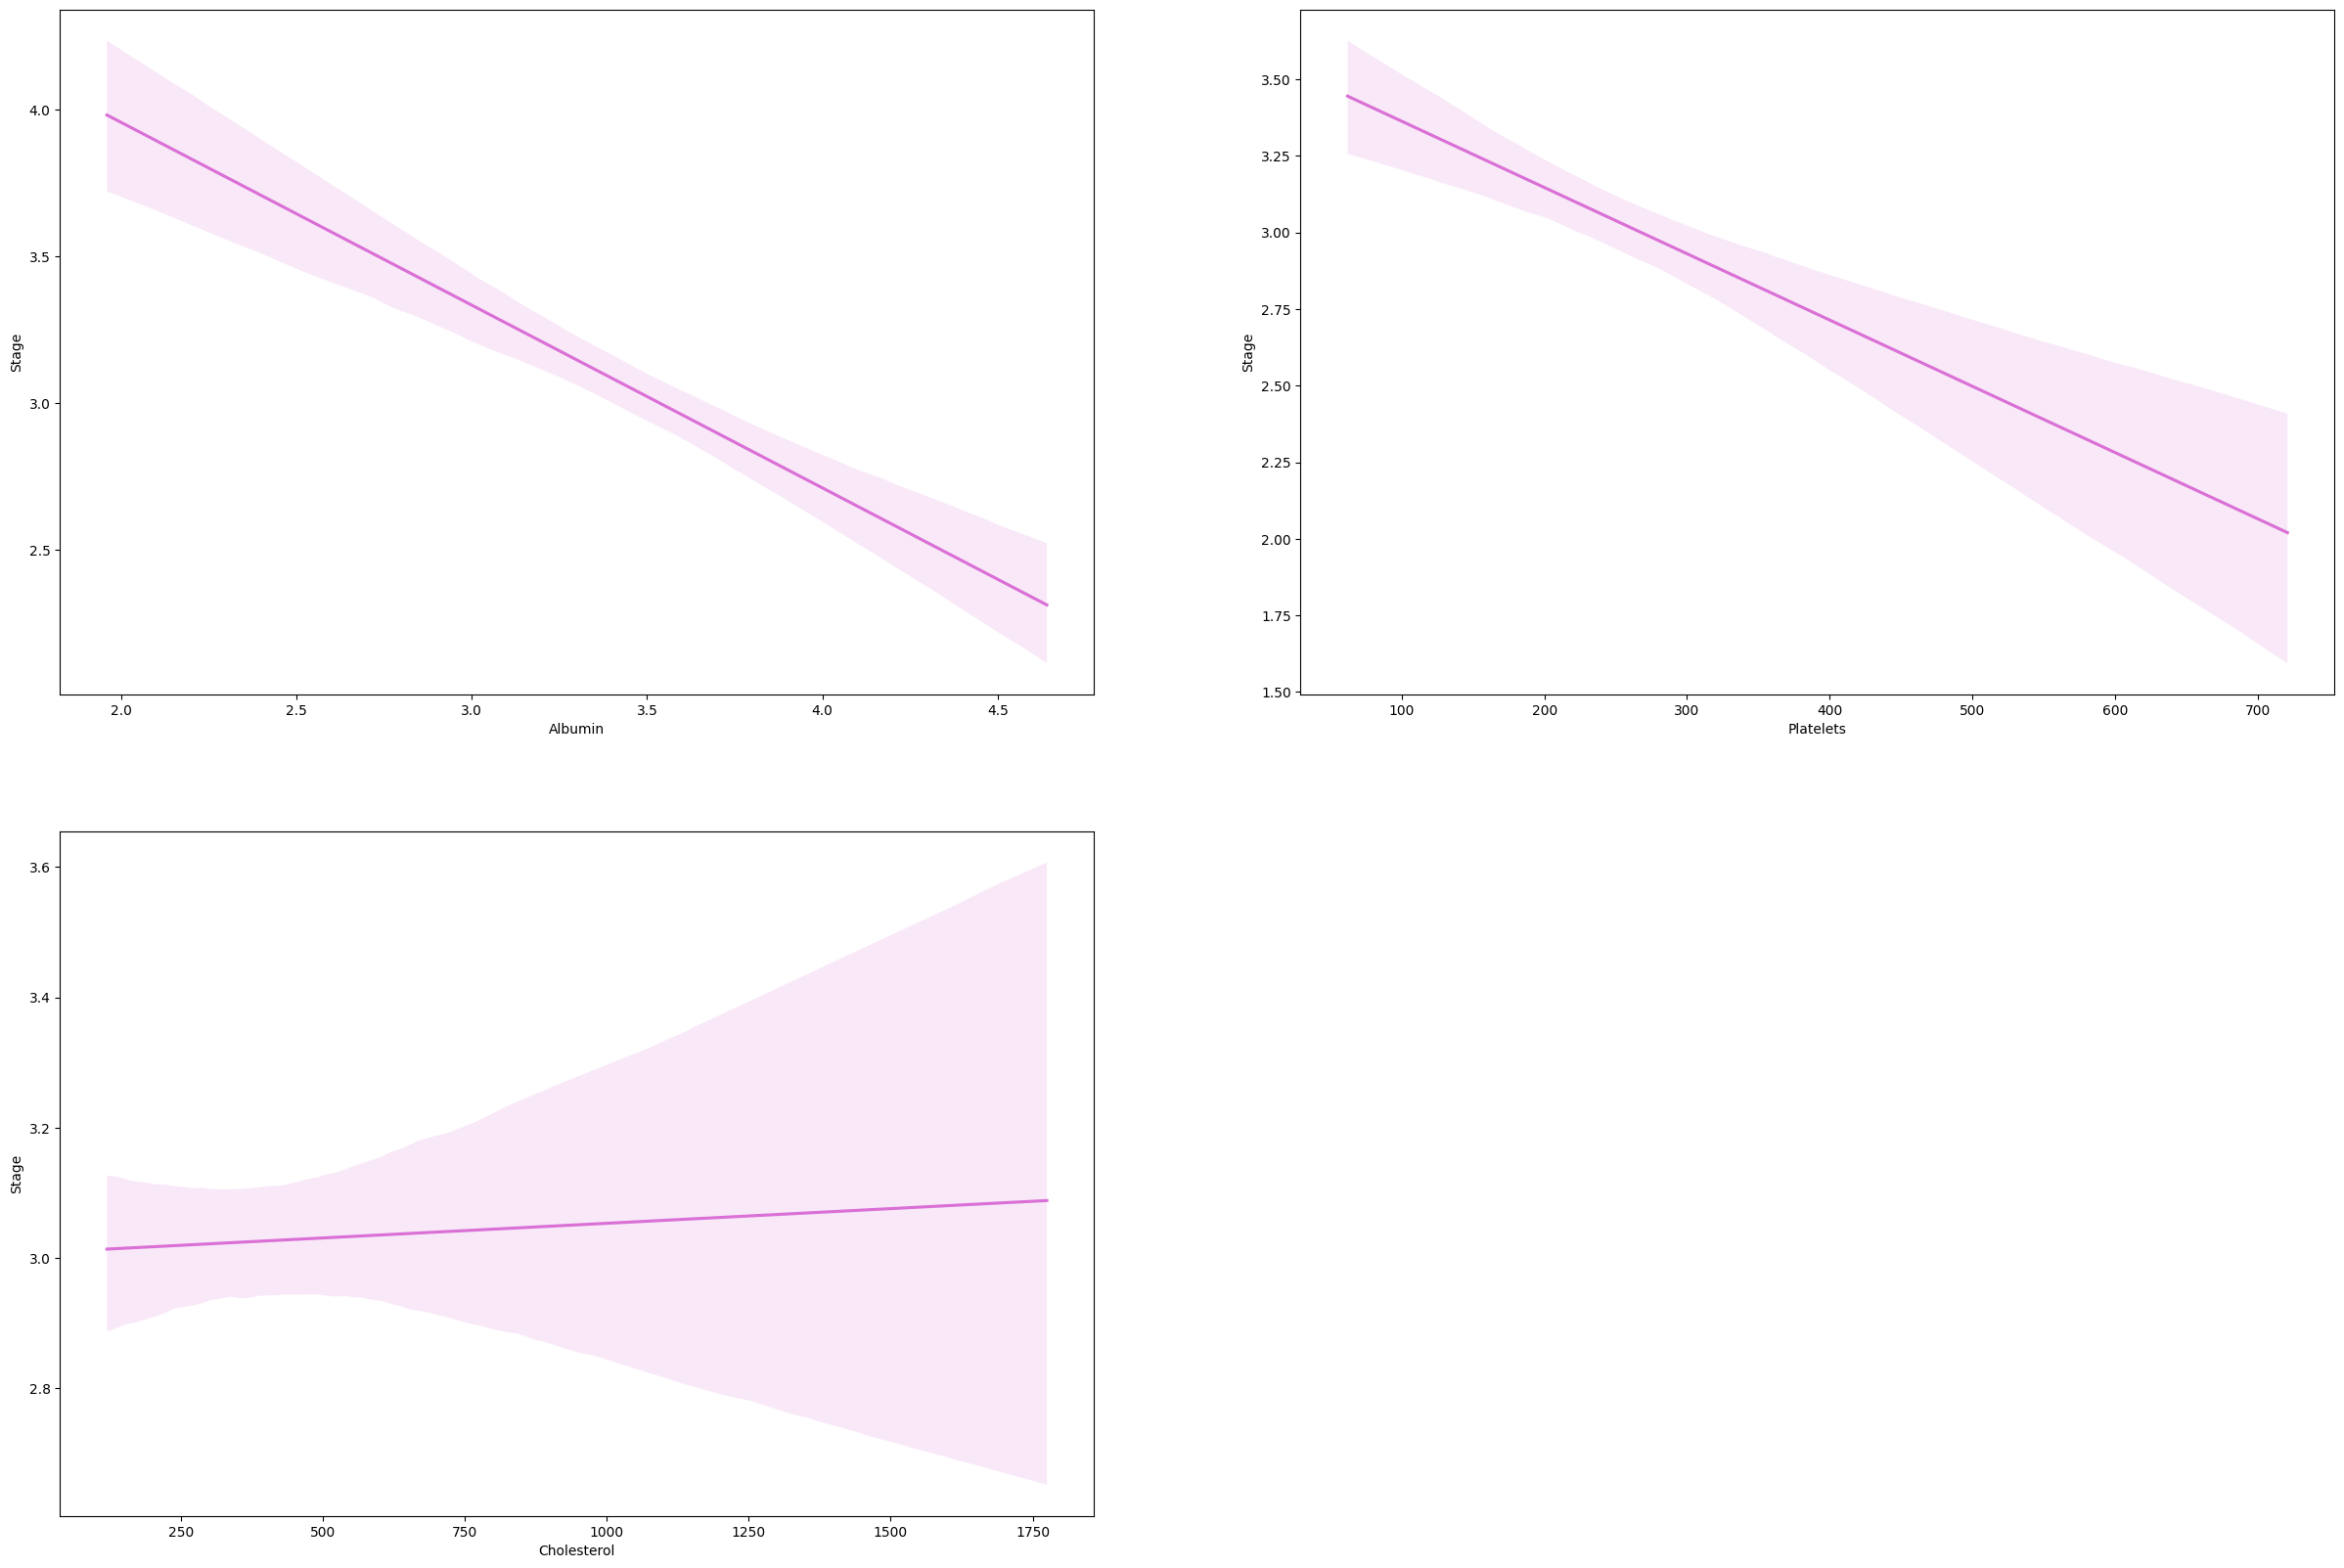

In [ ]:
plt.figure(figsize = (30,20))
loop = data[["Albumin","Platelets","Cholesterol"]]
i = 0
for c in loop:
    i +=1
    plt.subplot(2,2,i)
    sn.regplot(x = data[c],y = data["Stage"],scatter=False, color='orchid')

Text(0.5, 1.0, 'positive correlation of gender ("Female") with SGOT')

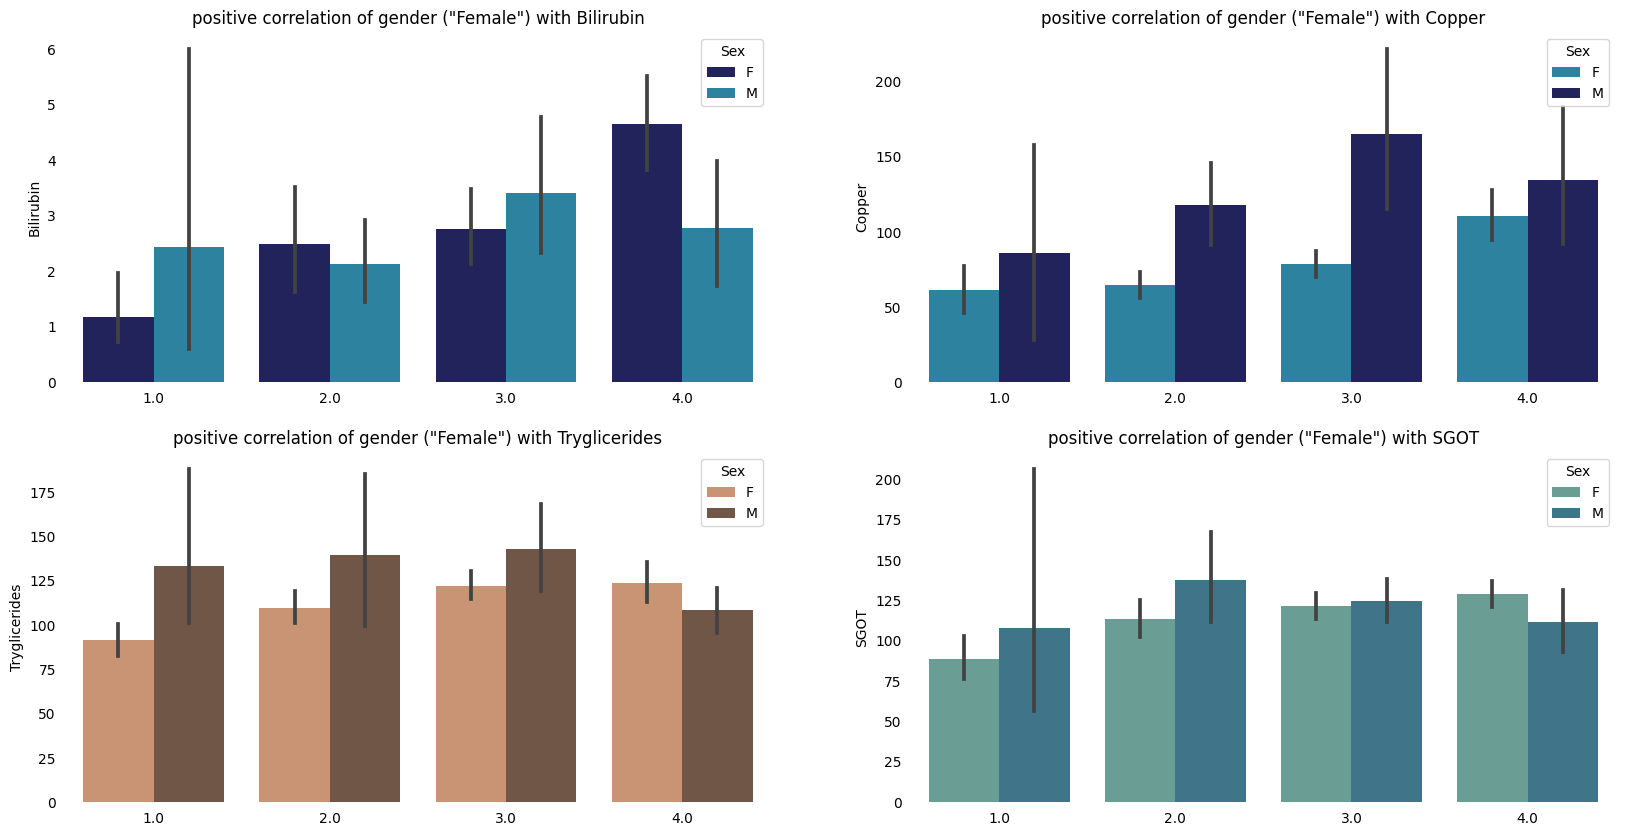

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sn.barplot(x=data['Stage'],y = data["Bilirubin"],hue=data['Sex'], palette='ocean', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with Bilirubin')

plt.subplot(2,2,2)
sn.barplot(x=data['Stage'],y = data["Copper"],hue=data['Sex'], palette='ocean_r', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with Copper')

plt.subplot(2,2,3)
sn.barplot(x=data['Stage'],y = data["Tryglicerides"],hue=data['Sex'], palette='copper_r', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with Tryglicerides')
plt.subplot(2,2,4)
sn.barplot(x=data['Stage'],y = data["SGOT"],hue=data['Sex'], palette='crest', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('positive correlation of gender ("Female") with SGOT')

Text(0.5, 1.0, 'correlation of gender ("Female") with Prothrombin')

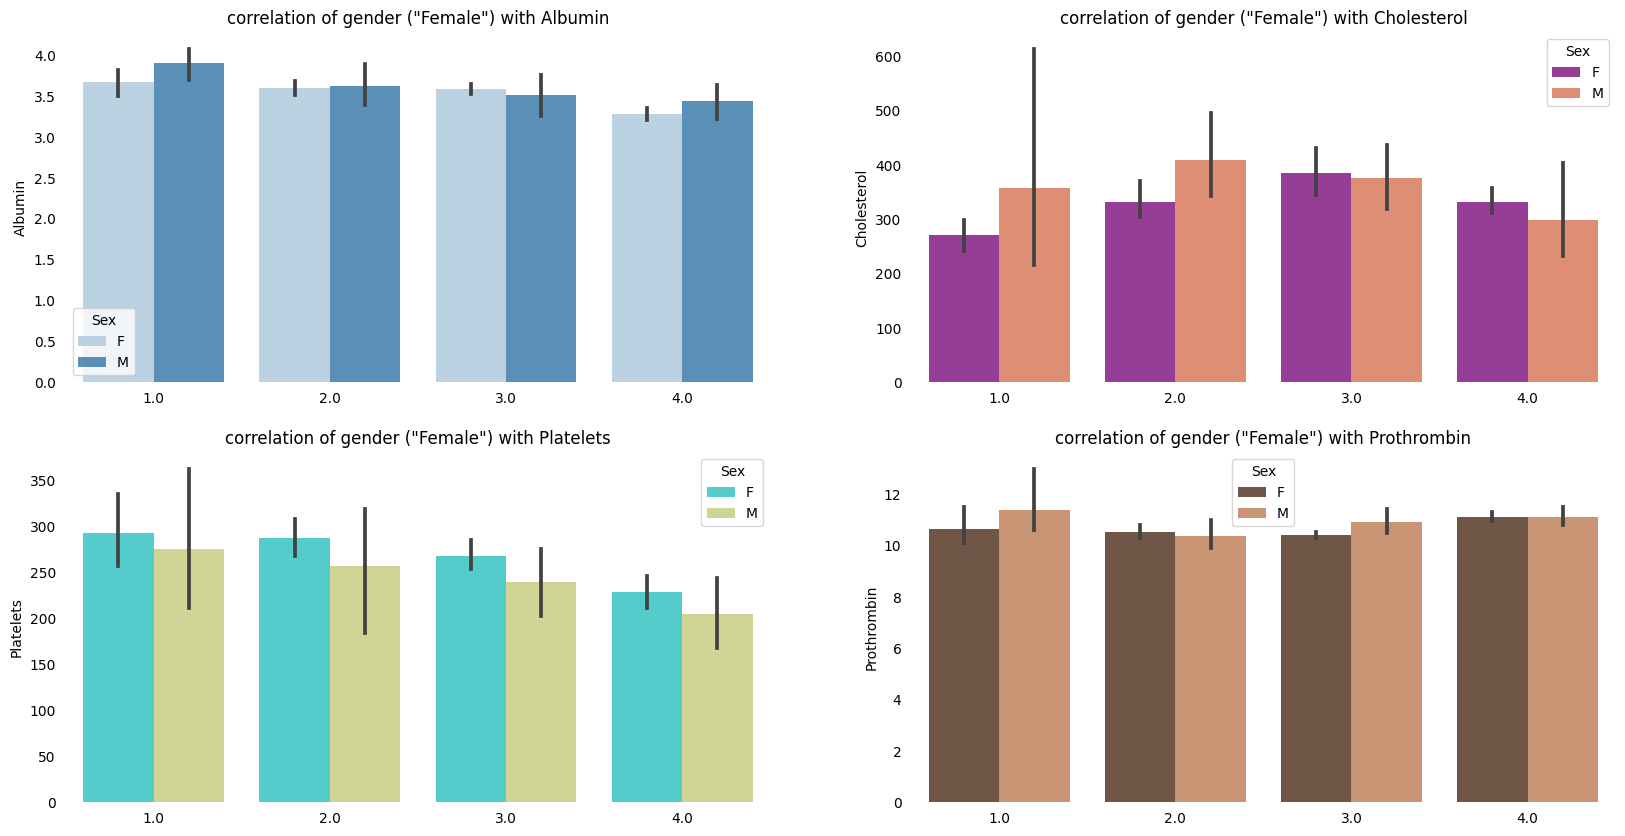

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sn.barplot(x=data['Stage'],y = data["Albumin"],hue=data['Sex'], palette='Blues', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('correlation of gender ("Female") with Albumin')


plt.subplot(2,2,2)
sn.barplot(x=data['Stage'],y = data["Cholesterol"],hue=data['Sex'], palette='plasma', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('correlation of gender ("Female") with Cholesterol')

plt.subplot(2,2,3)
sn.barplot(x=data['Stage'],y = data["Platelets"],hue=data['Sex'], palette='rainbow', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('correlation of gender ("Female") with Platelets')


plt.subplot(2,2,4)
sn.barplot(x=data['Stage'],y = data["Prothrombin"],hue=data['Sex'], palette='copper', alpha=0.9)
sn.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('correlation of gender ("Female") with Prothrombin' )

In [ ]:
data["Sex"].replace("M",0,inplace = True)
data["Sex"].replace("F",1,inplace = True)
data["Stage"].replace(4,"x",inplace = True)
data["Stage"].replace(1,0,inplace = True)
data["Stage"].replace(2,0,inplace = True)
data["Stage"].replace(3,0,inplace = True)
data["Stage"].replace("x",1,inplace = True)
data["Hepatomegaly"].replace("Y",1,inplace = True)
data["Hepatomegaly"].replace("N",0,inplace = True)
data["Ascites"].replace("Y",1,inplace = True)
data["Ascites"].replace("N",0,inplace = True)
data["Edema"].replace("Y",1,inplace = True)
data["Edema"].replace("N",0,inplace = True)
data["Edema"].replace("S",0,inplace = True)
data["Status"].replace("CL",0,inplace=True)
data["Status"].replace("C",1,inplace=True)
data["Status"].replace("D",0,inplace=True)
data["Drug"].replace("D-penicillamine",1,inplace = True)
data["Drug"].replace("Placebo",0,inplace = True)
data["Spiders"].replace("Y",1,inplace = True)
data["Spiders"].replace("N",0,inplace = True)

data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,1,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,2,4500,1,1,20617,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,3,1012,0,1,25594,0,0,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,4,1925,0,1,19994,1,0,1,1,0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,5,1504,0,0,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,0,1,24472,1,0,1,0,0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,0
414,415,1103,1,1,14245,1,0,1,0,0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,1
415,416,1055,1,1,20819,1,0,1,0,0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,0
416,417,691,1,1,21185,1,0,1,0,0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,0


In [ ]:
y = data["Stage"]
X = data.drop(['Status', 'N_Days', 'Stage'],axis = 1)
y
X


,ID,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,1,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,2,1,20617,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,3,1,25594,0,0,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,4,1,19994,1,0,1,1,0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,5,0,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,1,24472,1,0,1,0,0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9
414,415,1,14245,1,0,1,0,0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2
415,416,1,20819,1,0,1,0,0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9
416,417,1,21185,1,0,1,0,0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model  = RandomForestClassifier(n_estimators = 100,max_depth = 12,random_state = 0)
skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 10)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=3000)

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)

from sklearn.ensemble import BaggingClassifier
model4 = BaggingClassifier(
    n_estimators=100,oob_score=True)

In [ ]:
acc = []
score = 0

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    acc.append(score)
    print(score)
print("percentage of random forest is")
print(np.mean(acc)*100)

0.8333333333333334
0.7619047619047619
0.6666666666666666
0.8095238095238095
0.7619047619047619
0.7380952380952381
0.7619047619047619
0.7380952380952381
0.8292682926829268
0.6829268292682927
percentage of random forest is
75.8362369337979


Text(70.72222222222221, 0.5, 'Truth')

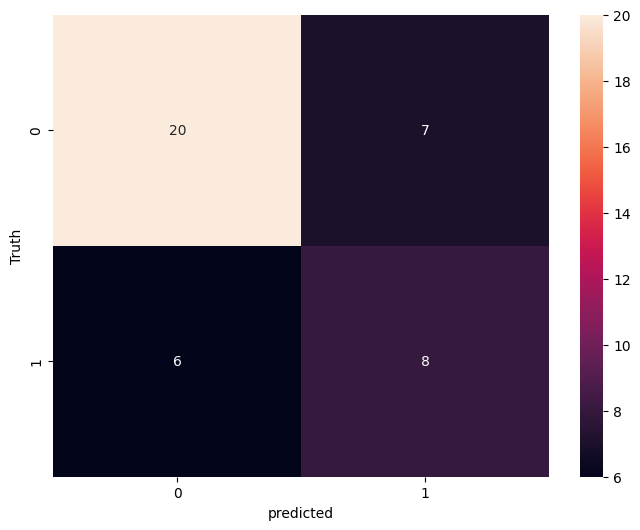

In [ ]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)


plt.figure(figsize = (8,6))
sn.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [ ]:
acc2 = []

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model2.fit(x_train,y_train)
    score = model2.score(x_test,y_test)
    acc2.append(score)
    print(score)
print("percentage of logistic_regression is")
print(np.mean(acc2)*100)

0.8571428571428571
0.7619047619047619
0.7380952380952381
0.8095238095238095
0.7857142857142857
0.6666666666666666
0.6428571428571429
0.7380952380952381
0.8292682926829268
0.7317073170731707
percentage of logistic_regression is
75.60975609756098


Text(70.72222222222221, 0.5, 'Truth')

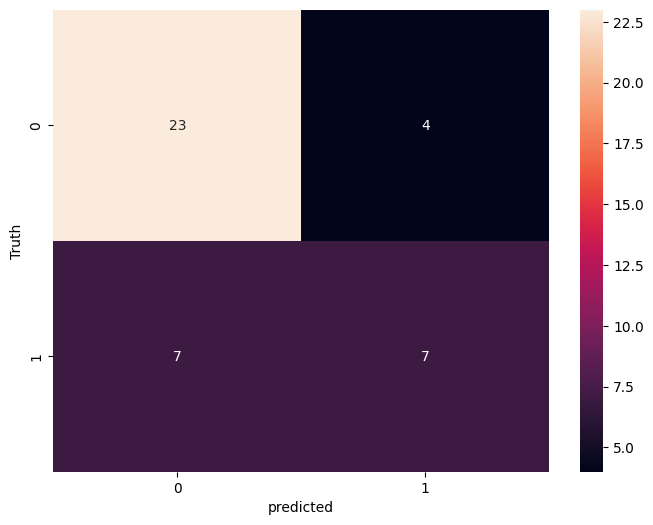

In [ ]:
y_predicted = model2.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (8,6))
sn.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [ ]:
acc3 = []

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model3.fit(x_train,y_train)
    score = model3.score(x_test,y_test)
    acc3.append(score)
    print(score)
print("percentage of KNNeighborClassifier is")
print(np.mean(acc3)*100)

0.6190476190476191
0.5952380952380952
0.6666666666666666
0.6428571428571429
0.6904761904761905
0.6428571428571429
0.6904761904761905
0.6666666666666666
0.5853658536585366
0.5853658536585366
percentage of KNNeighborClassifier is
63.85017421602787


<Axes: >

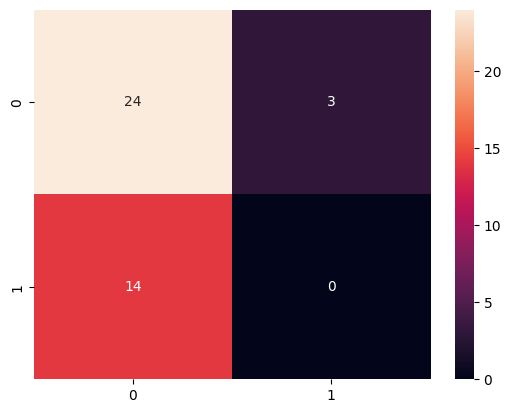

In [ ]:
y_predicted = model3.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
sn.heatmap(cm,annot=True)

In [ ]:
acc4 = []

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model4.fit(x_train,y_train)
    score4 = model4.oob_score_
    acc4.append(score4)
    print(score4)
print("percentage of BaggingClassifier is")
print(np.mean(acc4)*100)

0.7127659574468085
0.7420212765957447
0.7313829787234043
0.7127659574468085
0.7021276595744681
0.7393617021276596
0.7393617021276596
0.726063829787234
0.7294429708222812
0.7374005305039788
percentage of BaggingClassifier is
72.72694565156046
